In [1]:
#files:
#https://s3.amazonaws.com/hackerday.datascience/104/Telecom_Train.csv
#https://s3.amazonaws.com/hackerday.datascience/104/Telecom_Test.csv


In [2]:
# customer churn

#1. How to identify who is likely to churn?
#Ans: 55
#Confusion Matrix and Statistics

 #         Reference
#Prediction   no  yes
 #      no  1431   12
  #     yes   55  169


#2. what are the factors responsible for churn?
#Ans:
                               Overall
total_day_minutes             100.0000
number_customer_service_calls  45.7696
total_eve_minutes              42.7228
international_planyes          31.3732
total_intl_calls               28.3674
total_intl_minutes             26.2008
voice_mail_planyes             24.7855
total_night_minutes             3.8101
total_eve_charge                1.0626
stateTX                         0.9406
number_vmail_messages           0.8528
stateNJ                         0.7793
total_day_calls                 0.5591
account_length                  0.5560
area_codearea_code_415          0.5383
total_night_calls               0.4822
stateME                         0.3698
total_night_charge              0.3091
stateMS                         0.2307
total_eve_calls                 0.1141

#3. what kind of recommendation we can provide to the organization?
#Answer:
#compute the average total day minutes of churn vs. no-churn, customize offerings to retain customers

#4. who are most valuable customers?
#Answer:
#revenue share of customers from the various plans outlined

#5. how valid is the churn prediction model?
# answer:
#run a validation on test dataset and report the acuracy

In [4]:
train = read.csv('https://s3.amazonaws.com/hackerday.datascience/104/Telecom_Train.csv')

In [5]:
head(train)

X,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,⋯,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,⋯,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,⋯,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,⋯,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,⋯,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,⋯,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,⋯,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no


In [6]:
train_df = train[,-1]

In [7]:
head(train_df)

state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no


In [9]:
test = read.csv('https://s3.amazonaws.com/hackerday.datascience/104/Telecom_Test.csv')

In [10]:
test_df = test[,-1]

In [11]:
head(test_df)

state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no
IA,117,area_code_415,no,no,0,226.5,85,38.51,141.6,68,12.04,223.0,90,10.04,6.9,5,1.86,1,no


In [20]:
# Univariate: table, density, 
# bi-variate : correlations, cross tabs
dim(train_df)

[1] 3333   20

In [15]:
str(train_df)

'data.frame':	3333 obs. of  20 variables:
 $ state                        : Factor w/ 51 levels "AK","AL","AR",..: 17 36 32 36 37 2 20 25 19 50 ...
 $ account_length               : int  128 107 137 84 75 118 121 147 117 141 ...
 $ area_code                    : Factor w/ 3 levels "area_code_408",..: 2 2 2 1 2 3 3 2 1 2 ...
 $ international_plan           : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 1 2 ...
 $ voice_mail_plan              : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 2 1 1 2 ...
 $ number_vmail_messages        : int  25 26 0 0 0 0 24 0 0 37 ...
 $ total_day_minutes            : num  265 162 243 299 167 ...
 $ total_day_calls              : int  110 123 114 71 113 98 88 79 97 84 ...
 $ total_day_charge             : num  45.1 27.5 41.4 50.9 28.3 ...
 $ total_eve_minutes            : num  197.4 195.5 121.2 61.9 148.3 ...
 $ total_eve_calls              : int  99 103 110 88 122 101 108 94 80 111 ...
 $ total_eve_charge             : num  16.78 16.62 10.3 5.26 12.61 ...

In [16]:
summary(train_df)

     state      account_length          area_code    international_plan
 WV     : 106   Min.   :  1.0   area_code_408: 838   no :3010          
 MN     :  84   1st Qu.: 74.0   area_code_415:1655   yes: 323          
 NY     :  83   Median :101.0   area_code_510: 840                     
 AL     :  80   Mean   :101.1                                          
 OH     :  78   3rd Qu.:127.0                                          
 OR     :  78   Max.   :243.0                                          
 (Other):2824                                                          
 voice_mail_plan number_vmail_messages total_day_minutes total_day_calls
 no :2411        Min.   : 0.000        Min.   :  0.0     Min.   :  0.0  
 yes: 922        1st Qu.: 0.000        1st Qu.:143.7     1st Qu.: 87.0  
                 Median : 0.000        Median :179.4     Median :101.0  
                 Mean   : 8.099        Mean   :179.8     Mean   :100.4  
                 3rd Qu.:20.000        3rd Qu.:216.4     3r

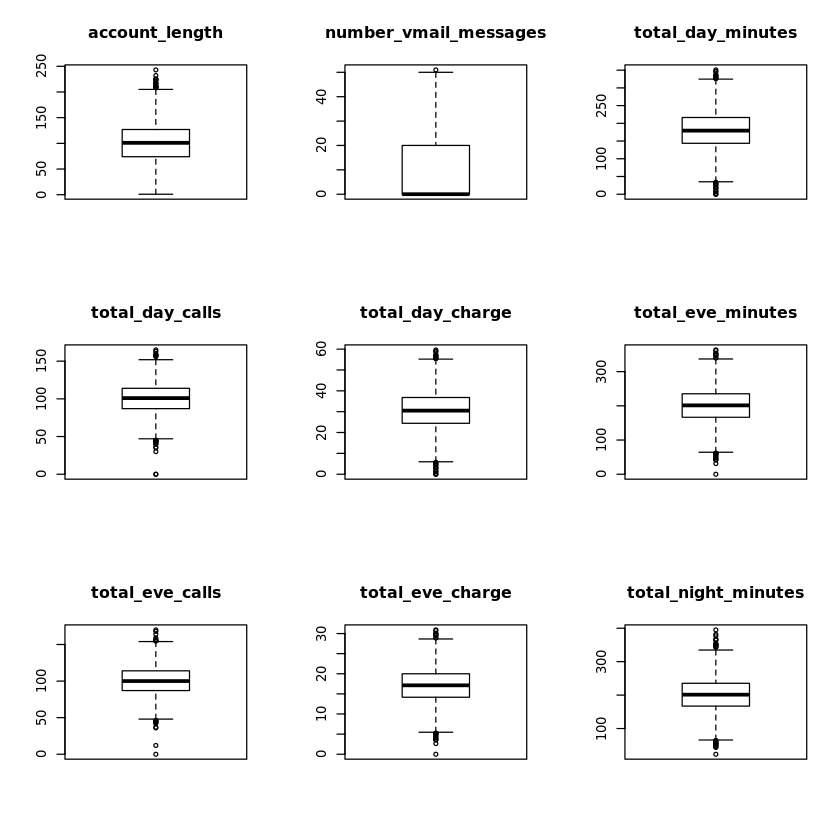

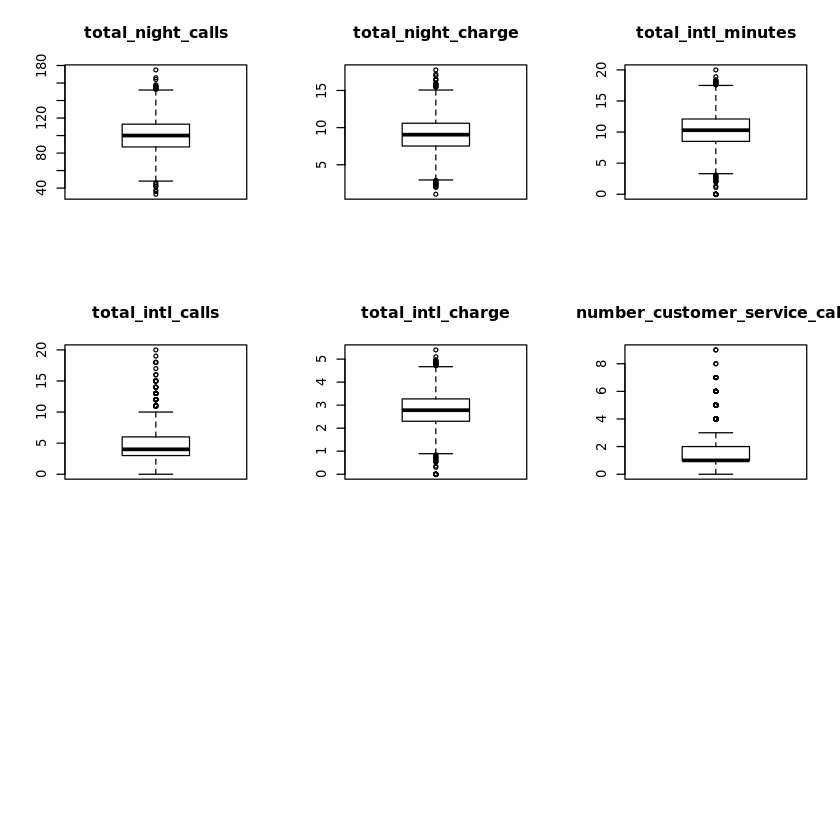

In [28]:
traindf = train_df[,c(2,6:19)]
# boxplot
par(mfrow=c(3,3))
for(i in 1:ncol(traindf)) {
    boxplot(traindf[,i], main=names(traindf)[i])
}

[1] 18

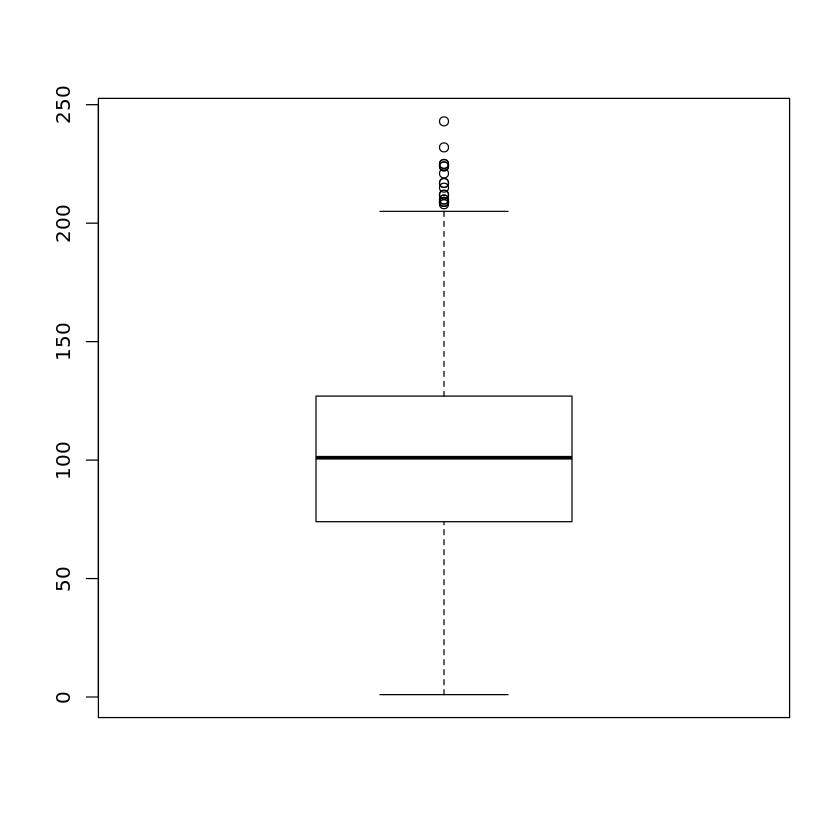

In [41]:
length(boxplot(train$account_length)$out)

[1] 208

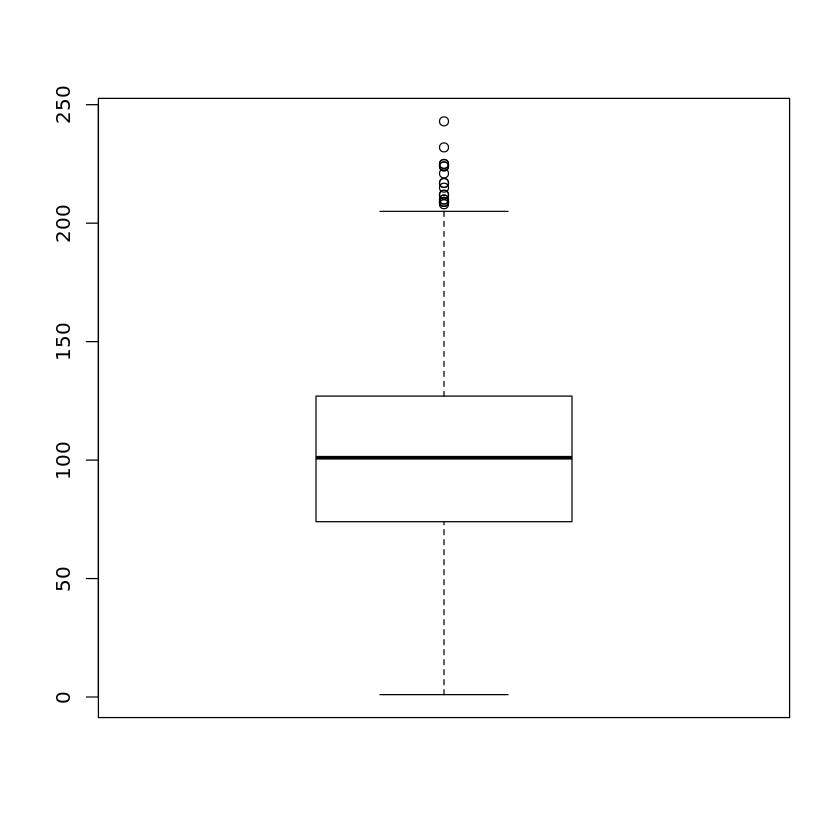

In [43]:
min(boxplot(train$account_length)$out)

In [46]:
quantile(train$account_length,prob=c(0.99))

99% 
195

In [47]:
train$account_length <- ifelse(train$account_length > quantile(train$account_length,prob=c(0.99)),
                              quantile(train$account_length,prob=c(0.99)),train$account_length)

[1] 0

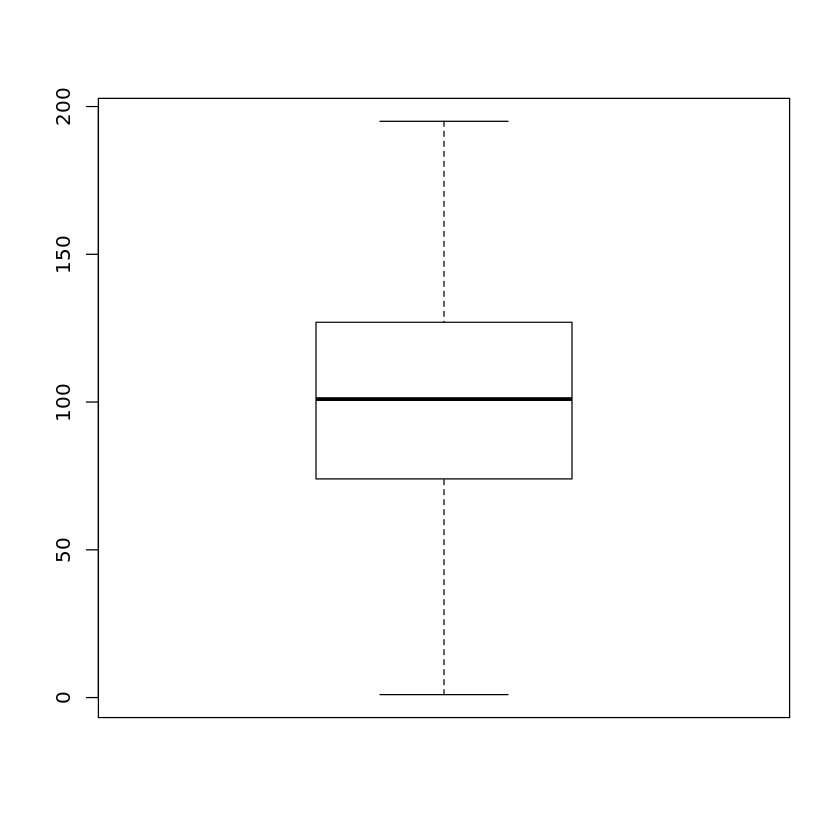

In [48]:
length(boxplot(train$account_length)$out)

In [29]:
traindf = train_df[,c(-2,-6:-19)]


In [30]:
head(traindf)

state,area_code,international_plan,voice_mail_plan,churn
KS,area_code_415,no,yes,no
OH,area_code_415,no,yes,no
NJ,area_code_415,no,no,no
OH,area_code_408,yes,no,no
OK,area_code_415,yes,no,no
AL,area_code_510,yes,no,no


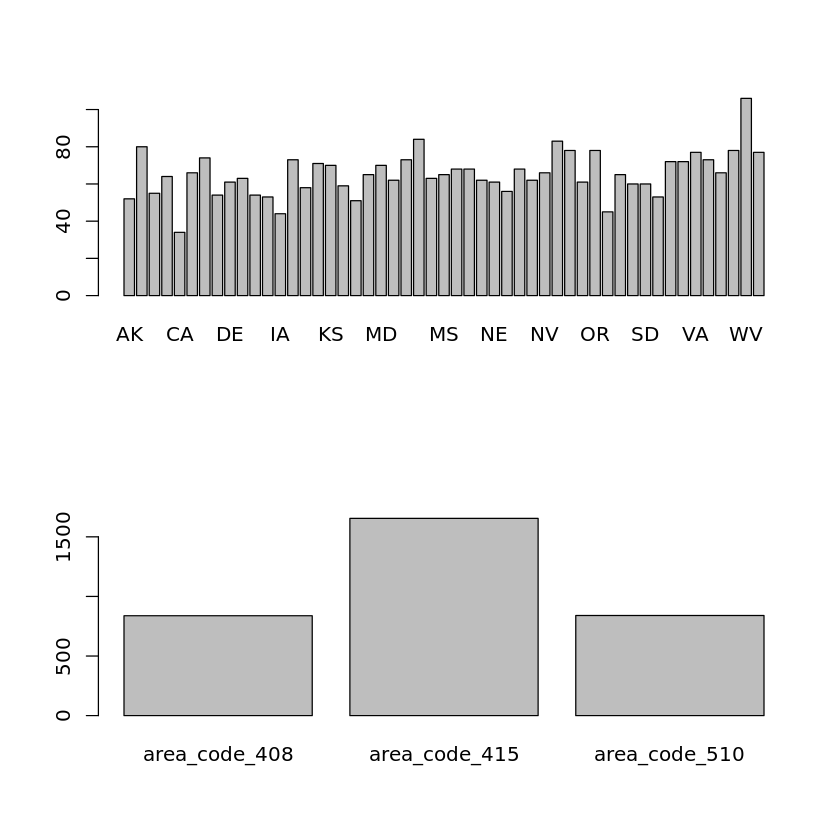

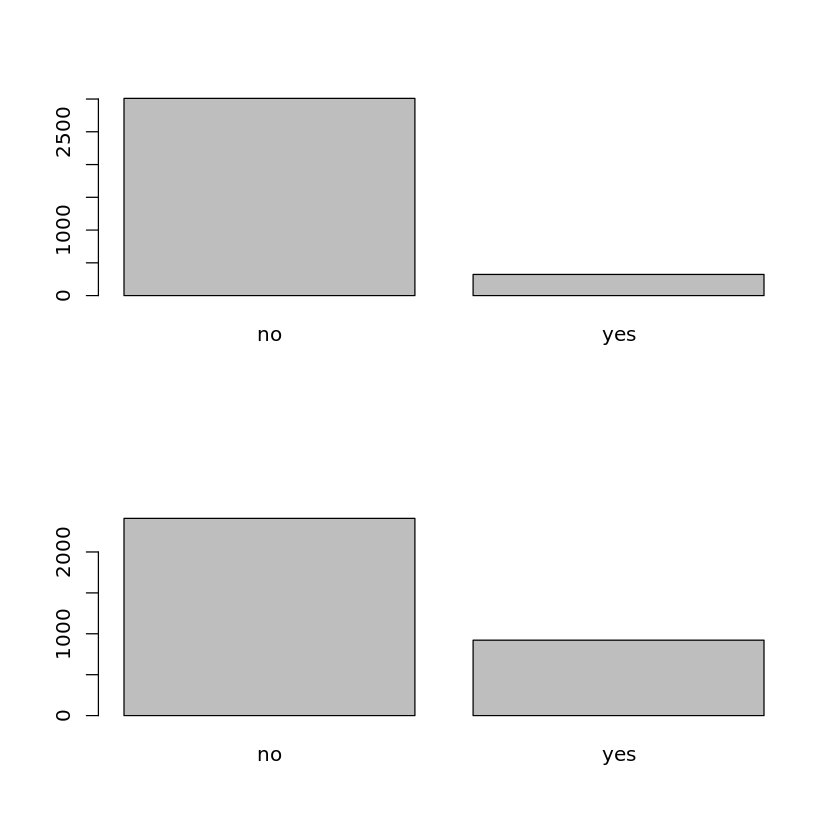

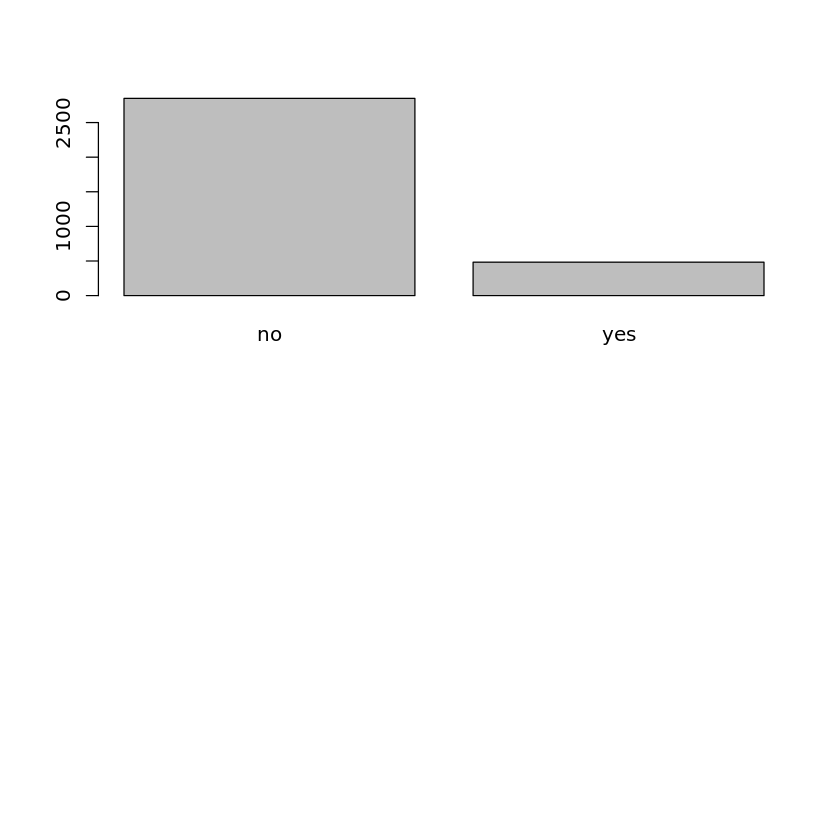

In [35]:
par(mfrow=c(2,1))
barplot(table(traindf$state))
barplot(table(traindf$area_code))
barplot(table(traindf$international_plan))
barplot(table(traindf$voice_mail_plan))
barplot(table(traindf$churn))

In [37]:
table(train_df$state)


 AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  HI  IA  ID  IL  IN  KS  KY  LA  MA 
 52  80  55  64  34  66  74  54  61  63  54  53  44  73  58  71  70  59  51  65 
 MD  ME  MI  MN  MO  MS  MT  NC  ND  NE  NH  NJ  NM  NV  NY  OH  OK  OR  PA  RI 
 70  62  73  84  63  65  68  68  62  61  56  68  62  66  83  78  61  78  45  65 
 SC  SD  TN  TX  UT  VA  VT  WA  WI  WV  WY 
 60  60  53  72  72  77  73  66  78 106  77 

In [38]:
library(dummy)

ERROR: Error in library(dummy): there is no package called ‘dummy’


In [ ]:
library(dummy)
train = read.csv('https://s3.amazonaws.com/hackerday.datascience/104/Telecom_Train.csv')
test = read.csv('https://s3.amazonaws.com/hackerday.datascience/104/Telecom_Test.csv')
train_df = train[,-1]
test_df = test[,-1]
traindf = train_df[,c(2,6:20)]

testdf = test_df[,c(2,6:20)]
# boxplot
par(mfrow=c(3,3))
for(i in 1:ncol(traindf)) {
  boxplot(traindf[,i], main=names(traindf)[i])
}

train_cat = train_df[,c(-2,-4:-20)]

test_cat = test_df[,c(-2,-4:-20)]

par(mfrow=c(2,1))
barplot(table(train_df$state))
barplot(table(train_df$area_code))
barplot(table(train_df$international_plan))
barplot(table(train_df$voice_mail_plan))
barplot(table(train_df$churn))

#create dummies

cat = dummy(train_cat,p='all')
cat = dummy(test_cat,p='all')
# final training dataset
final_train = data.frame(traindf,cat)
final_test = data.frame(testdf,cat)

# Does the outliers have any impact on the models?
library(caret)
library(mlr)

# basic logistic regression based classifier
# RUN 1:
fit_glm = glm(churn~.,data=final_train,
              family = binomial(link='logit'))
summary(fit_glm)

final_train$pred = ifelse(predict(fit_glm,
                                  final_train,
                                  type = 'response')>0.5,'yes','no')

confusionMatrix(final_train$churn,final_train$pred)

final_test$pred = ifelse(predict(fit_glm,
                                  final_test,
                                  type = 'response')>0.5,'yes','no')

confusionMatrix(final_test$churn,final_test$pred)

# if i change the threshold probability will that change the reliability
# statistics

# the split of probability should be in confirmity with the 
# train dataset
(table(final_train$churn)/nrow(final_train)*100)
(table(final_train$pred)/nrow(final_train)*100)
(table(final_test$churn)/nrow(final_test)*100)
(table(final_test$pred)/nrow(final_test)*100)
#-----------------------------------------------
# RUN 2:
final_train$pred = ifelse(predict(fit_glm,
                                  final_train,
                                  type = 'response')>0.6,'yes','no')

confusionMatrix(final_train$churn,final_train$pred)

final_test$pred = ifelse(predict(fit_glm,
                                 final_test,
                                 type = 'response')>0.6,'yes','no')

confusionMatrix(final_test$churn,final_test$pred)

# the split of probability should be in confirmity with the 
# train dataset
(table(final_train$churn)/nrow(final_train)*100)
(table(final_train$pred)/nrow(final_train)*100)
(table(final_test$churn)/nrow(final_test)*100)
(table(final_test$pred)/nrow(final_test)*100)

#--------------------------------------------------
# RUN 3:
final_train$pred = ifelse(predict(fit_glm,
                                  final_train,
                                  type = 'response')>0.4,'yes','no')

confusionMatrix(final_train$churn,final_train$pred)

final_test$pred = ifelse(predict(fit_glm,
                                 final_test,
                                 type = 'response')>0.4,'yes','no')

confusionMatrix(final_test$churn,final_test$pred)

# the split of probability should be in confirmity with the 
# train dataset
(table(final_train$churn)/nrow(final_train)*100)
(table(final_train$pred)/nrow(final_train)*100)
(table(final_test$churn)/nrow(final_test)*100)
(table(final_test$pred)/nrow(final_test)*100)
#--------------------------------------------------------------
# RUN 4:
final_train$pred = ifelse(predict(fit_glm,
                                  final_train,
                                  type = 'response')>0.3,'yes','no')

confusionMatrix(final_train$churn,final_train$pred)

final_test$pred = ifelse(predict(fit_glm,
                                 final_test,
                                 type = 'response')>0.3,'yes','no')

confusionMatrix(final_test$churn,final_test$pred)

# the split of probability should be in confirmity with the 
# train dataset
(table(final_train$churn)/nrow(final_train)*100)
(table(final_train$pred)/nrow(final_train)*100)
(table(final_test$churn)/nrow(final_test)*100)
(table(final_test$pred)/nrow(final_test)*100)

#Accuracy : 0.8368  
#Kappa : 0.3065 

# Let's try how to stabilize the results.
# cross validation step to stabilize the models
library(caret)
library(rpart)
train_control <-trainControl(method = 'cv',number = 10)
metric <- 'Accuracy'

# Decision tree based methods
fit_dt <- train(churn~.,data=train_df,
                trControl=train_control,
                method='rpart')

fit_dt
predictions <- predict(fit_dt,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)

#Accuracy : 0.8872 
#Kappa : 0.3413
varImp(fit_dt)
#----------------
# Decision tree based methods
fit_dtc50 <- train(churn~.,data=train_df,
                trControl=train_control,
                method='C5.0')

fit_dtc50
predictions <- predict(fit_dtc50,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_dtc50)

#Accuracy : 0.961   
#Kappa : 0.8146

#------------------------------------
#logistic regression model
fit_glm <- train(churn~.,data=train_df,
                   trControl=train_control,
                   method='glm')

fit_glm
predictions <- predict(fit_glm,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_glm)

#Accuracy : 0.8692 
#Kappa : 0.2699 

#----------------------------------------------
fit_bstTree <- train(churn~.,data=train_df,
                 trControl=train_control,
                 method='bstTree')

fit_bstTree
predictions <- predict(fit_bstTree,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_bstTree)

#Accuracy : 0.9442 
#Kappa : 0.7182  
#----------------------------------------
fit_C5.0Cost <- train(churn~.,data=train_df,
                     trControl=train_control,
                     method='C5.0Cost')

fit_C5.0Cost
predictions <- predict(fit_C5.0Cost,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_C5.0Cost)

#Accuracy : 0.961  
#Kappa : 0.8146

#----------------------------------
fit_C5.0Rules <- train(churn~.,data=train_df,
                      trControl=train_control,
                      method='C5.0Rules')

fit_C5.0Rules
predictions <- predict(fit_C5.0Rules,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_C5.0Rules)

#Accuracy : 0.9472 
#Kappa : 0.7441   

#--------------------------------
fit_treebag <- train(churn~.,data=train_df,
                       trControl=train_control,
                       method='treebag')

fit_treebag
predictions <- predict(fit_treebag,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_treebag)

#Accuracy : 0.9526
#Kappa : 0.7718   
#--------------------------------
fit_xgbTree <- train(churn~.,data=train_df,
                     trControl=train_control,
                     method='xgbTree')

fit_xgbTree
predictions <- predict(fit_xgbTree,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_xgbTree)

#Accuracy : 0.8656 
#Kappa : 0.1155 

#--------------------------------
# Ensemble methods
# Bagging- boost strap aggregation (random forest)
# Boosting- (gradient boosting)
# stacking- (different models)
# 500 observations to train the grid search model for ensemble learning
# takes time to finish one run

control <- trainControl(method = 'repeatedcv',
                        number = 10,
                        repeats = 3)
seed <- 1234
metric <- 'Accuracy'
set.seed(seed)
mtry <- sqrt(ncol(train_df))
tunegrid <- expand.grid(.mtry = mtry)
fit_rf_default <- train(churn~.,
                        data=train_df[1:500,],
                        method='rf',
                        metric=metric,
                        trControl=control)
fit_rf_default

predictions <- predict(fit_rf_default,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_rf_default)

#Accuracy : 0.931
#Kappa : 0.6546

#-----------------------------------------
control <- trainControl(method = 'repeatedcv',
                        number = 10,
                        repeats = 3,
                        search = 'random')
seed <- 1234
metric <- 'Accuracy'
set.seed(seed)
mtry <- sqrt(ncol(train_df))
#tunegrid <- expand.grid(.mtry = mtry)
fit_rf_random <- train(churn~.,
                        data=train_df[1:1000,],
                        method='rf',
                        metric=metric,
                       tuneLength=15,
                        trControl=control)
fit_rf_random
predictions <- predict(fit_rf_random,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_rf_random)

#Accuracy : 0.9424 
#Kappa : 0.7072

plot(fit_rf_random)


#-----------------------------------------
control <- trainControl(method = 'repeatedcv',
                        number = 10,
                        repeats = 3,
                        search = 'grid')
seed <- 1234
metric <- 'Accuracy'
set.seed(seed)
#mtry <- sqrt(ncol(train_df))
tunegrid <- expand.grid(.mtry = c(1:15))
fit_rf_grid <- train(churn~.,
                       data=train_df[1:1000,],
                       method='rf',
                       metric=metric,
                       tuneGrid=tunegrid,
                       trControl=control)
fit_rf_grid
predictions <- predict(fit_rf_grid,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_rf_grid)

plot(fit_rf_grid)

#---------------
#boosting model:
control <- trainControl(method = 'repeatedcv',
                        number = 10,
                        repeats = 3,
                        search = 'grid')
seed <- 1234
metric <- 'Accuracy'
set.seed(seed)
fit_gbm <- train(churn~.,
                     data=train_df,
                     method='gbm',
                     metric=metric,
                     trControl=control)
fit_gbm
predictions <- predict(fit_gbm,test_df)
pred = cbind(test_df,predictions)

confusionMatrix(pred$churn,pred$predictions)
varImp(fit_gbm)

plot(fit_gbm)

# first we will run different models with outlier

# remove outliers/impute the outliers

# re-run the models on the transformed dataset

# compare the accuracy

# validate if the outliers have any impact?





In [ ]:
Model	Metric	Value
Logistic	#Accuracy 	0.8368
	#Kappa 	0.3065
Rpart	#Accuracy 	0.8872
	#Kappa 	0.3413
C50	#Accuracy 	0.961
	#Kappa 	0.8146
GLM	#Accuracy 	0.8692
	#Kappa 	0.2699
BSTree	#Accuracy 	0.9442
	#Kappa 	0.7182
C50Cost	#Accuracy 	0.961
	#Kappa 	0.8146
C50Rules	#Accuracy 	0.9472
	#Kappa 	0.7441
Treebag	#Accuracy 	0.9526
	#Kappa 	0.7718
Xgboost	#Accuracy 	0.8656
	#Kappa 	0.1155